# Results

This Notebook visualizes the results gathered from the tests.

#### Loading data

In [36]:
import numpy as np
from os import path
import logging
logging.getLogger().setLevel(logging.CRITICAL)

data_path = 'data/'

data = {}

data['epochs'] = np.arange(5, 105, 5)

percentage_strings = ['010', '030', '050']
selectors = ['K-Centers', 'Random']
percentages = [10, 30, 50, 100]

data[100] = np.loadtxt(data_path + '100_resnet_fullset.csv', delimiter=',')

for percentage_string in percentage_strings:
    frac = int(percentage_string)

    sel_dict = {}
    for selector in selectors:
        filename = '{}_resnet_{}_fullset.csv'.format(percentage_string, selector.lower())

        sel_dict[selector.lower()] = np.loadtxt(data_path+filename)

    data[frac] = sel_dict

## Visualization

In [37]:
import matplotlib

matplotlib.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'font.size': 14,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

from matplotlib import pyplot as plt

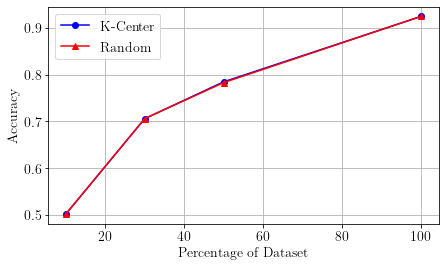

In [39]:
plt.figure(figsize=(7, 4))

kcenter = []
random = []

for percentage in percentages[:3]:
    kcenter.append(data[percentage]['k-centers'][-1])
    random.append(data[percentage]['random'][-1])
    
acc_full_data = data[100][-1]
kcenter.append(acc_full_data)
random.append(acc_full_data)
    

plt.plot(percentages, kcenter, color='blue', marker='o', label='K-Center')
plt.plot(percentages, random, color='red', marker='^', label='Random')
plt.xlabel('Percentage of Dataset')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.savefig('accuracy_over_setsize.eps', bbox_inches='tight')